In [386]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
from matplotlib.patches import Circle, PathPatch, Rectangle
import time
import matplotlib.colors as mcolors


# Turns data into (x,y) points of histogram to plot
def histToPlot(data, bins):
    [histData,bins] = np.histogram(data, bins=bins)
    binCenters = np.array([0.5 * (bins[j] + bins[j+1]) for j in range(len(bins)-1)])
    return binCenters, histData

# For creating basic histograms

# For creating basic histograms
def basicHist(data, bins=100, save=False, name="", mean=False, show=False, hRange=[], xlim=[], ylim=[], xlabel="", ylabel="", logx=False, logy=False, area_max_plot=-99999999,legHand=[],save_dir=None,fig_dict=None,label=None,color=None):
    # Get existing plot by same name, if it exists
    try:
        fig, ax = fig_dict[name]
    except (TypeError, KeyError):
        fig, ax = pl.subplots()
    if len(hRange) > 1:
        cut = (data>hRange[0])*(data<hRange[1])
        data = data[cut]
        ax.hist(data, bins, range=(hRange[0],hRange[1]), histtype='step',label=label,color=color )
    else: ax.hist(data, bins, histtype='step',label=label,color=color)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if mean and area_max_plot<np.mean(data) and (fig_dict is None): ax.axvline(x=np.mean(data), ls='--', color='r')
    if len(xlim) > 1: ax.xlim(xlim[0],xlim[1])
    if len(ylim) > 1: ax.ylim(ylim[0],ylim[1])
    if logx: ax.set_xscale("log")
    if logy: ax.set_yscale("log")
    if len(legHand) > 0: ax.legend(handles=legHand)
    elif fig_dict is not None: ax.legend()
    if save and save_dir is not None: fig.savefig(str(save_dir)+str(name)+".png")
    if fig_dict is not None: # save figure and axis info to dictionary for later use
        fig_dict[name] = (fig, ax)
    if show: ax.show()

    return

# For creating basic scatter plots
def basicScatter(xdata, ydata, s=[], c=[], save=False, name="", mean=False, show=False, xlim=[], ylim=[], xlabel="", ylabel="", logx=False, logy=False, area_max_plot=-99999999,legHand=[],save_dir=None,showsipms=False):
    pl.figure()
    if showsipms:
        w = 0.6 # Photosensitive area in cm
        d_x = 1.23 # cm
        d_y = 1.14 # cm
        r = 1.5 # cm, active TPC radius
        c1 = pl.Circle((0., 0.), r, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
        r1 = pl.Rectangle((d_x/2.-w/2., d_y/2.-w/2.), w, w, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
        r2 = pl.Rectangle((d_x/2.-w/2., -d_y/2.-w/2.), w, w, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
        r3 = pl.Rectangle((-d_x/2.-w/2., -d_y/2.-w/2.), w, w, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
        r4 = pl.Rectangle((-d_x/2.-w/2., d_y/2.-w/2.), w, w, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
        #pl.gca().add_patch(c1)
        #pl.gca().add_patch(r1)
        #pl.gca().add_patch(r2)
        #pl.gca().add_patch(r3)
        #pl.gca().add_patch(r4)
        pl.axis('square')
    pl.scatter(xdata, ydata, s=s, c=c)

    pl.xlabel(xlabel)
    pl.ylabel(ylabel)
    
    if mean and area_max_plot<np.mean(xdata): pl.axvline(x=np.mean(xdata), ls='--', color='r')
    if len(xlim) > 1: pl.xlim(xlim[0],xlim[1])
    if len(ylim) > 1: pl.ylim(ylim[0],ylim[1])
    if logx: pl.xscale("log")
    if logy: pl.yscale("log")
    if len(legHand) > 0: pl.legend(handles=legHand)
    if save and save_dir is not None: pl.savefig(str(save_dir)+str(name)+".png")
    if show: pl.show()
    pl.close()

    return

# For creating heatmaps, i.e. 2D histograms (can be weighted if desired)
def basicHeatmap(xdata, ydata, weights=None, bins=40, save=False, name="", show=False, xlim=[], ylim=[], cmin=1e-12, cmax=None, xlabel="", ylabel="", logx=False, logy=False, logz=False, legHand=[], save_dir=None):
    pl.figure()
    if len(xlim)>1 and len(ylim)>1: hist_range = [xlim, ylim]
    else: hist_range = None
    if logz: norm = mcolors.LogNorm()
    else: norm = mcolors.Normalize()
    _, _, _, image = pl.hist2d(xdata, ydata, bins=bins, range=hist_range, weights=weights, cmin=cmin, cmax=cmax, norm=norm)
    pl.colorbar(image)

    pl.xlabel(xlabel)
    pl.ylabel(ylabel)

    if logx: pl.xscale("log")
    if logy: pl.yscale("log")
    if len(legHand) > 0: pl.legend(handles=legHand)
    if save and save_dir is not None: pl.savefig(str(save_dir)+str(name)+".png")
    if show: pl.show()
    pl.close()

    return

fig_dict = None

# set plotting style
if fig_dict is not None:
    mpl.rcParams['font.size']=18
    mpl.rcParams['legend.fontsize']='large'
else:
    mpl.rcParams['font.size']=10
    mpl.rcParams['legend.fontsize']='small'
mpl.rcParams['figure.autolayout']=True
mpl.rcParams['figure.figsize']=[8.0,6.0]
mpl.rcParams['figure.max_open_warning']=False

# use for coloring pulses
pulse_class_colors = np.array(['blue', 'green', 'red', 'magenta', 'darkorange'])
pulse_class_labels = np.array(['Other', 'S1-like LXe', 'S1-like gas', 'S2-like', 'Merged S1/S2'])
pc_legend_handles=[]
for class_ind in range(len(pulse_class_labels)):
    pc_legend_handles.append(mpl.patches.Patch(color=pulse_class_colors[class_ind], label=str(class_ind)+": "+pulse_class_labels[class_ind]))

# define DAQ and other parameters
tscale = (8.0/4096.0)     # = 0.002 µs/sample, time scale

n_sipms = 32
n_channels = n_sipms+1 # includes sum
d_between_SiPM_center_x = 1.23 # cm
d_between_SiPM_center_y = 1.14 # cm
    
# define top, bottom channels
n_top = int((n_channels-1)/2)
top_channels=np.array(range(n_top),int)
bottom_channels=np.array(range(n_top,2*n_top),int)

In [446]:


#data_dir = "/home/xaber/Data/data-202205/20220525/20220525-1634_2DR_200mVtrig_15us_3201.0C_3001.0G_1000A_54SiPM_1.31bar_-100.98ICVbot_2fold_bg_5min/"
#data_dir = "/home/xaber/Data/data-202205/20220525/20220525-1651_2DR_400mVtrig_15us_3201.0C_3001.0G_1000A_54SiPM_1.27bar_-100.98ICVbot_2fold_bg_5min/"
data_dir = "/home/xaber/Data/data-202205/20220525/20220525-1415_2DR_5mVtrig_15us_3201.0C_3001.0G_1000A_54SiPM_1.27bar_-100.98ICVbot_2fold_bg_20min/"
#data_dir = "/home/xaber/Data/data-202205/20220511/20220511-1648_2DR_20mVtrig_15us_3201.0C_3001.0G_1000A_54SiPM_1.74bar_-97.96ICVbot_2foldcoin_condensed_coTop/"
save_dir = data_dir

In [447]:

#data_dir = "G:/.shortcut-targets-by-id/11qeqHWCbcKfFYFQgvytKem8rulQCTpj8/crystalize/data/data-202204/20220415/202204151553_1bar_2200C_2000G_0A_54B_15us_0.5Vpp/"
#data_dir = "/home/xaber/Data/data-202205/20220511/20220511-1441_2DR_20mVtrig_15us_3201.0C_3001.0G_1000A_54SiPM_1.89bar_-97.36ICVbot_2foldcoin_condensed/"
#data_dir = "/home/xaber/Data/data-202205/20220511/20220511-1648_2DR_20mVtrig_15us_3201.0C_3001.0G_1000A_54SiPM_1.74bar_-97.96ICVbot_2foldcoin_condensed_coTop/"


# Front side, below
#data_dir = "/home/xaber/Data/data-202205/20220512/20220512-0958_2DR_20mVtrig_15us_3201.0C_3001.0G_1000A_54SiPM_1.51bar_-101.29ICVbot_2foldcoin_condensed_coSideUpper/"

# Front side, above
#data_dir = "/home/xaber/Data/data-202205/20220512/20220512-0939_2DR_20mVtrig_15us_3201.0C_3001.0G_1000A_54SiPM_1.53bar_-101.29ICVbot_2foldcoin_condensed_coSideUpper_front/"

# Left side, above
#data_dir = "/home/xaber/Data/data-202205/20220512/20220512-1016_2DR_20mVtrig_15us_3201.0C_3001.0G_1000A_54SiPM_1.51bar_-101.29ICVbot_2foldcoin_condensed_coSideUpper_left/"

# Right side, above 
#data_dir = "/home/xaber/Data/data-202205/20220512/20220512-1326_2DR_20mVtrig_15us_3201.0C_3001.0G_1000A_54SiPM_1.51bar_-101.29ICVbot_2foldcoin_condensed_coSideUpper_right/"


#data_dir = "/home/xaber/Data/data-202205/20220512/20220512-1431_2DR_20mVtrig_15us_3201.0C_3001.0G_1000A_54SiPM_1.48bar_-101.59ICVbot_2foldcoin_condensed_circ_ref/"

#data_dir = "/home/xaber/Data/data-202205/20220512/20220512-1516_2DR_20mVtrig_15us_3201.0C_3001.0G_1000A_54SiPM_1.46bar_-101.59ICVbot_2foldcoin_condensed_circ_15minRn/"

save_dir = data_dir


#read RQ
listrq = np.load(data_dir+'rq.npz')

n_events = listrq['n_events'][()]
n_pulses = listrq['n_pulses']
n_s1 = listrq['n_s1']
n_s2 = listrq['n_s2']
s1_before_s2 = listrq['s1_before_s2']
p_area = listrq['p_area']
p_class = listrq['p_class']
drift_Time = listrq['drift_Time']
drift_Time_AS = listrq['drift_Time_AS']
p_max_height = listrq['p_max_height']
p_min_height = listrq['p_min_height']
p_width = listrq['p_width']
p_afs_2l = listrq['p_afs_2l']
p_afs_50 = listrq['p_afs_50']
p_area_ch = listrq['p_area_ch']
p_area_ch_frac = listrq['p_area_ch_frac']
p_area_top = listrq['p_area_top']
p_area_bottom = listrq['p_area_bottom']
p_tba = listrq['p_tba']
p_start = listrq['p_start']
p_end = listrq['p_end']
sum_s1_area = listrq['sum_s1_area']
sum_s2_area = listrq['sum_s2_area']
center_top_x = listrq['center_top_x']
center_top_y = listrq['center_top_y']
center_bot_x = listrq['center_bot_x']
center_bot_y = listrq['center_bot_y']
center_bot_x_d = center_bot_x * d_between_SiPM_center_x/2
center_bot_y_d = center_bot_y * d_between_SiPM_center_y/2
center_top_x_d = center_top_x * d_between_SiPM_center_x/2
center_top_y_d = center_top_y * d_between_SiPM_center_y/2

listrq.close()
#end of RQ read

(p_class == 1)*(p_class == 2)

#s1_area = 
#s2_area = 





drift_Time_new = np.zeros(n_events)
for i in range(int(n_events)):
    if n_s2[i] > 0:
        drift_Time_new[i] = (p_afs_50[i,int(n_s1[i])] - p_afs_50[i,0])*tscale

p_t_rise = tscale*(p_afs_50-p_afs_2l)

# Define some standard cuts for plotting
cut_dict = {}
cut_dict['ValidPulse'] = p_area > 0.1
cut_dict['PulseClass0'] = p_class == 0
cut_dict['S1'] = ((p_class == 1) + (p_class == 2))*cut_dict['ValidPulse']
n_s1 = np.sum(cut_dict['S1'], axis=1) # redefine to only include valid pulses
cut_dict['S2'] = ((p_class == 3) + (p_class == 4))*cut_dict['ValidPulse']
n_s2 = np.sum(cut_dict['S2'], axis=1)
cut_dict['Co_peak'] = (p_area>30)*(p_area<60)
cut_dict['SmallS1'] = cut_dict['S1']*(p_area<500)
cut_dict['LargeS1'] = cut_dict['S1']*(p_area>500)
cut_dict['TopCo'] = cut_dict['S1']*(p_tba>0.0)*(p_area>200)
cut_dict['TopS1'] = cut_dict['S1']*(p_tba>0.75)
cut_dict['PoS1'] = cut_dict['S1']*(p_tba<0)*(p_tba>-1)*(p_area>10000)*(p_area<40000)
cut_dict['PoUpS1'] = cut_dict['S1']*(p_tba<0)*(p_tba>-0.7)*(p_area>10000)*(p_area<40000)
cut_dict['PoDownS1'] = cut_dict['S1']*(p_tba<-0.7)*(p_tba>-1)*(p_area>10000)*(p_area<40000)
cut_dict['PoSmallS1'] = cut_dict['S1']*(p_tba<-0.25)*(p_tba>-1)*(p_area>0)*(p_area<2000)
cut_dict['PoMedS1'] = cut_dict['S1']*(p_tba<-0.25)*(p_tba>-1)*(p_area>2000)*(p_area<5000)
cut_dict['PoMedLgS1'] = cut_dict['S1']*(p_tba<-0.75)*(p_tba>-1)*(p_area>5000)*(p_area<10000)
cut_dict['S1_200-400phd'] = cut_dict['S1']*(p_area>200)*(p_area<400)
cut_dict['S1_0-200phd'] = cut_dict['S1']*(p_area>0)*(p_area<200)

# Pick which cut from cut_dict to apply here and whether to save plots
save_pulse_plots=True # One entry per pulse
save_S1S2_plots=True # One entry per S1 (S2) pulse
save_event_plots=True # One entry per event
save_2S2_plots=True # One entry per event w/ 2 S2s
save_PoS1_plots=False # One entry per event w/ 1 Po S1, specific to studies of S2 multiplicity
pulse_cut_name = "ValidPulse" # 'ValidPulse'#'Co_peak'#'PoS1'#
pulse_cut = cut_dict[pulse_cut_name]



cleanArea = p_area[pulse_cut].flatten()
cleanMax = p_max_height[pulse_cut].flatten()
cleanMin = p_min_height[pulse_cut].flatten()
cleanWidth = tscale*p_width[pulse_cut].flatten()
cleanHeight = p_max_height[pulse_cut].flatten()
cleanPulseClass = p_class[pulse_cut].flatten()

cleanAFS2l = p_afs_2l[pulse_cut].flatten()
cleanAFS50 = p_afs_50[pulse_cut].flatten()
cleanRiseTime = p_t_rise[pulse_cut].flatten()

cleanAreaCh = p_area_ch[pulse_cut] # pulse_cut gets broadcast to the right shape
cleanAreaChFrac = p_area_ch_frac[pulse_cut]
cleanAreaTop = p_area_top[pulse_cut].flatten()
cleanAreaBottom = p_area_bottom[pulse_cut].flatten()
cleanTBA = p_tba[pulse_cut].flatten()
# Note: TBA can be <-1 or >+1 if one of top or bottom areas is <0 (can still be a valid pulse since total area >0)
cleanCenterBottomX = center_bot_x_d[pulse_cut]
cleanCenterBottomY = center_bot_y_d[pulse_cut]
cleanCenterTopX = center_top_x_d[pulse_cut]
cleanCenterTopY = center_top_y_d[pulse_cut]

cleanTopR2 = np.asarray(np.power(cleanCenterTopX,2) + np.power(cleanCenterTopY,2) )

s1_cut = pulse_cut*cut_dict['S1']
cleanS1Area = p_area[s1_cut].flatten()
cleanS1RiseTime = p_t_rise[s1_cut].flatten()
cleanS1AreaChFrac = p_area_ch_frac[s1_cut]
cleanS1TBA = p_tba[s1_cut].flatten()

s2_cut = pulse_cut*cut_dict['S2']
cleanS2Area = p_area[s2_cut].flatten()
cleanS2RiseTime = p_t_rise[s2_cut].flatten()
cleanS2AreaChFrac = p_area_ch_frac[s2_cut]
cleanS2TBA = p_tba[s2_cut].flatten()


# Quantities for plotting only events with n number of pulses, not just all of them
# May still contain empty pulses
howMany = n_pulses < 1000 # How many pulses you do want
nArea = p_area[howMany,:]
nMax = p_max_height[howMany,:]
nmin = p_min_height[howMany,:]
nWidth = p_width[howMany,:]

na2l = p_afs_2l[howMany]
na50 = p_afs_50[howMany]


# Event level quantities
event_cut_dict = {}
event_cut_dict["SS"] = (n_s1>=1)*(n_s2==1) # only include valid pulses
event_cut_dict["AllEvents"] = n_pulses > 0
event_cut_dict["All_Scatter"] = (drift_Time_AS > 0)*(n_s1==1)*(n_s2>0)
event_cut_dict["MS"] = (n_s1 == 1)*(n_s2 > 1)*s1_before_s2
event_cut_dict["Po"] = event_cut_dict["SS"]*np.any((p_tba<-0.0)*(p_tba>-1)*(p_area>10000)*(p_area<40000)*cut_dict["S1"], axis=1)#np.any((p_tba<-0.85)*(p_tba>-0.91)*(p_area>1500)*(p_area<2700), axis=1) # true if any pulse in event matches these criteria
event_cut_dict["Po_AS"] = (drift_Time_AS>0.)*(drift_Time_AS<1.5)*np.any((p_tba<-0.6)*(p_tba>-1)*(p_area>5000)*(p_area<20000), axis=1)#np.any((p_tba<-0.85)*(p_tba>-0.91)*(p_area>1500)*(p_area<2700), axis=1) # true if any pulse in event matches these criteria
event_cut_dict["Co-like"] = event_cut_dict["SS"]*np.any((p_area<1000.)*cut_dict["S1"], axis=1)
event_cut_dict["Co-like_AS"] = event_cut_dict["All_Scatter"]*np.any((p_area<1000.)*cut_dict["S1"], axis=1)
event_cut_dict["lg_S1"] = event_cut_dict["SS"]*np.any((p_area>1000.)*cut_dict["S1"], axis=1) # true if any S1 has area>1000
event_cut_dict["2S2"] = (np.sum(cut_dict['S2'], axis=1)==2)
event_cut_dict["SS_1-2us"] = event_cut_dict["SS"]*(drift_Time > 1)*(drift_Time < 2)
event_cut_dict["PoS1"] = (np.sum(cut_dict['PoS1'], axis=1)==1)#*(n_s2>0)
event_cut_dict["SS_S2_Co"] = event_cut_dict["SS"]*np.any((p_area<500.)*cut_dict["S1"], axis=1)



event_cut_name = "AllEvents"#"Co-like_AS"#"Po"#"lg_S1"
event_cut = event_cut_dict[event_cut_name]
cleanSumS1 = sum_s1_area[event_cut]
cleanSumS2 = sum_s2_area[event_cut]
# For events passing event_cut, get area-weighted avg of TBA for S1s only
cleanAvgS1TBA = np.sum(p_area[event_cut]*p_tba[event_cut]*s1_cut[event_cut],axis=1)/np.sum(p_area[event_cut]*s1_cut[event_cut],axis=1)
cleanSumS1TBA = p_tba[event_cut_dict['SS'][:,np.newaxis]*cut_dict['S1']]
cleanDT = drift_Time[event_cut]
cleanDTNew = drift_Time_new[event_cut]
cleanDT_AS = drift_Time_AS[event_cut]


centroid_scale = (0.6/4)*2.54

ctx_all = centroid_scale*center_top_x_d[event_cut,:]
cty_all = centroid_scale*center_top_y_d[event_cut,:]
ns1_cut = n_s1[event_cut]


ctx_s2 = np.zeros(ctx_all[:,0].size)
cty_s2 = np.zeros(ctx_all[:,0].size)
for i in range(ctx_all[:,0].size):
    if n_s1[i] > 0 and n_s1[i] < 4:
        ctx_s2[i] = ctx_all[i,int(n_s1[i])]
        cty_s2[i] = cty_all[i,int(n_s1[i])]

              
        
r2_s2 = np.power(ctx_s2,2) + np.power(cty_s2,2)
r_s2 = np.sqrt(r2_s2)






/tmp/ipykernel_1164240/3770755601.py:185: RuntimeWarning: invalid value encountered in true_divide
  cleanAvgS1TBA = np.sum(p_area[event_cut]*p_tba[event_cut]*s1_cut[event_cut],axis=1)/np.sum(p_area[event_cut]*s1_cut[event_cut],axis=1)


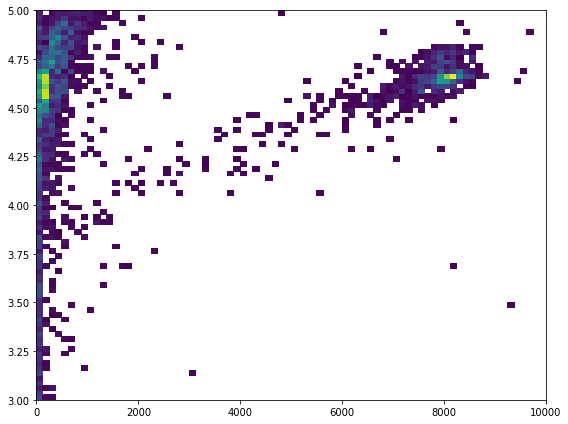

In [448]:
pl.figure()
pl.hist2d(cleanSumS1[cleanSumS2 > 0], np.log10(cleanSumS2[cleanSumS2 > 0]),bins=80,cmin=1,range=((0,10000),(3,5)))
pl.show()

(159, 4)
(159, 4)


/tmp/ipykernel_1164240/1816078939.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.scatter(sorted_p_area[:,1],np.log10(sorted_p_area[:,0]), 10)
/tmp/ipykernel_1164240/1816078939.py:7: RuntimeWarning: invalid value encountered in log10
  pl.scatter(sorted_p_area[:,1],np.log10(sorted_p_area[:,0]), 10)


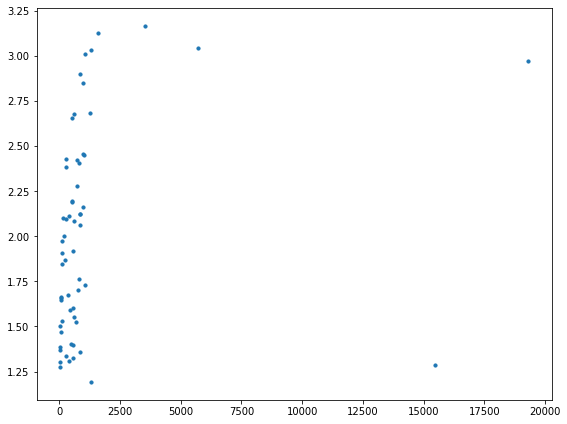

In [408]:

sorted_p_area = np.sort(p_area, axis=1)

print(p_area.shape)
print(sorted_p_area.shape)

pl.figure()
pl.scatter(sorted_p_area[:,1],np.log10(sorted_p_area[:,0]), 10)

#pl.xscale("log")
#pl.yscale("log")
pl.show()



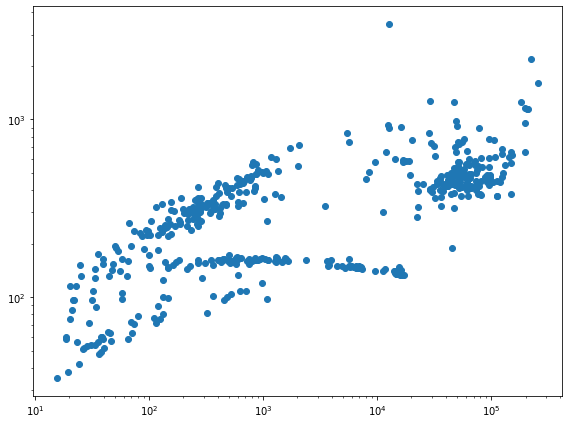

In [417]:
pl.figure()
pl.scatter(p_area[p_area > 0],p_width[p_area >0])
#pl.xlim(0,100000)
pl.xscale("log")
pl.yscale("log")
pl.show()



In [270]:
print(p_area_ch.shape)

(13499, 4, 32)


/tmp/ipykernel_1164240/3785305208.py:70: RuntimeWarning: invalid value encountered in double_scalars
  center_top_x[i,pp] /= - p_area_top[i,pp]
/tmp/ipykernel_1164240/3785305208.py:76: RuntimeWarning: invalid value encountered in double_scalars
  center_top_y[i,pp] /= p_area_top[i,pp]


[0. 0. 0. ... 0. 0. 0.]


/tmp/ipykernel_1164240/3785305208.py:103: RuntimeWarning: invalid value encountered in arccos
  ctx_s2_corr = w3*2*r*( 0.5-(1/np.pi)*np.arccos(r_s2_map/(0.9)) )*ctx_s2_map/(r_s2_map)
/tmp/ipykernel_1164240/3785305208.py:103: RuntimeWarning: invalid value encountered in true_divide
  ctx_s2_corr = w3*2*r*( 0.5-(1/np.pi)*np.arccos(r_s2_map/(0.9)) )*ctx_s2_map/(r_s2_map)
/tmp/ipykernel_1164240/3785305208.py:104: RuntimeWarning: invalid value encountered in arccos
  cty_s2_corr = w3*2*r*(0.5-(1/np.pi)*np.arccos(r_s2_map/(0.9))) *cty_s2_map/(r_s2_map)
/tmp/ipykernel_1164240/3785305208.py:104: RuntimeWarning: invalid value encountered in true_divide
  cty_s2_corr = w3*2*r*(0.5-(1/np.pi)*np.arccos(r_s2_map/(0.9))) *cty_s2_map/(r_s2_map)


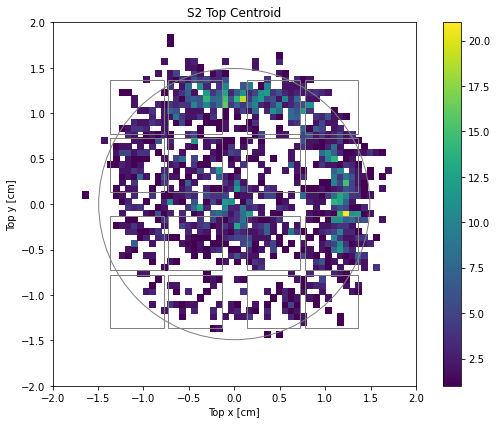

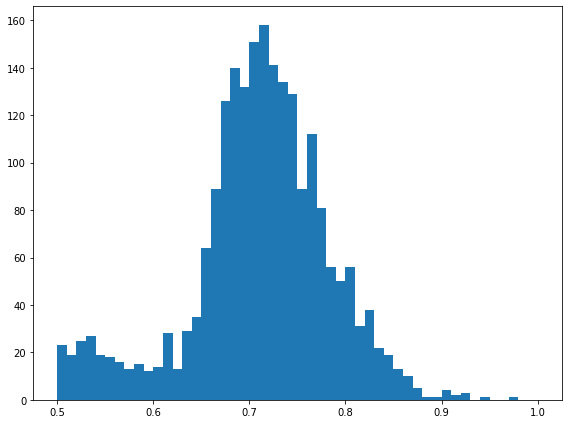

In [385]:
from matplotlib.patches import Circle, PathPatch, Rectangle
from matplotlib.colors import LogNorm

"""
pl.figure()
pl.scatter(np.sqrt(cleanTopR2),cleanTBA,1)
pl.xlim(-0.2,5)
pl.ylim(-1,1)
pl.xlabel("Top radius [unphysical unit]")
pl.ylabel("TBA")
pl.title("Valid Pulse, top r vs TBA ")
pl.grid("both","both")
pl.show()


pl.figure()
pl.scatter(r_s1, -drift_Time_new[drift_Time_new > 0],1)
pl.xlim(-0.2,5)
pl.ylim(-8,0)
pl.xlabel("S1 top radius [unphysical unit]")
pl.ylabel("-Drift Time [us]")
pl.title("S1 r vs DT ")
pl.grid("both","both")
pl.show()


pl.figure()
pl.hist2d(r_s1, -drift_Time_new[drift_Time_new > 0], bins=50, range=((0,5),(-8,0)),cmin=1 )
pl.xlim(-0.2,5)
pl.ylim(-8,0)
pl.xlabel("S1 top radius [unphysical unit]")
pl.ylabel("-Drift Time [us]")
pl.title("S1 top r vs DT ")
pl.grid("both","both")
pl.show()
"""


cut = 0.1
plot_scale = 2

w = (0.6/2)*2.54

pl.figure()

board_offset = 0
l = 0.59 # SiPM width/length (not exactly a square...see specs)
d1 = 0.75 + board_offset # distance from center of board to quadrant center 
d2 = 0.025 # distance from quadrant center to near SiPM edge
d3 = d2 + l # distance from quadrant center to far SiPM edge
d4 = 0.32 # distance from quadrant center to SiPM center


w1 = (d1-d4)
w2 = (d1+d4)
w3 = 1 #1.5 #1.6

r = (1.175/2)*2.54

t0 = -1

center_top_x = np.zeros((n_events,4))
center_top_y = np.zeros((n_events,4))
for i in range(n_events):
    for pp in range(4):
        center_top_x[i,pp] += w1*(p_area_ch[i,pp,t0+2]+p_area_ch[i,pp,t0+3]+p_area_ch[i,pp,t0+14]+p_area_ch[i,pp,t0+15])
        center_top_x[i,pp] += w2*(w3*p_area_ch[i,pp,t0+1]+p_area_ch[i,pp,t0+4]+p_area_ch[i,pp,t0+13]+w3*p_area_ch[i,pp,t0+16])
        center_top_x[i,pp] += -w1*(p_area_ch[i,pp,t0+5]+p_area_ch[i,pp,t0+8]+p_area_ch[i,pp,t0+9]+p_area_ch[i,pp,t0+12])
        center_top_x[i,pp] += -w2*(w3*p_area_ch[i,pp,t0+6]+p_area_ch[i,pp,t0+7]+p_area_ch[i,pp,t0+10]+w3*p_area_ch[i,pp,t0+11])
        center_top_x[i,pp] /= - p_area_top[i,pp]

        center_top_y[i,pp] += w1*(p_area_ch[i,pp,t0+7]+p_area_ch[i,pp,t0+8]+p_area_ch[i,pp,t0+3]+p_area_ch[i,pp,t0+4])
        center_top_y[i,pp] += w2*(w3*p_area_ch[i,pp,t0+6]+p_area_ch[i,pp,t0+5]+p_area_ch[i,pp,t0+2]+w3*p_area_ch[i,pp,t0+1])
        center_top_y[i,pp] += -w1*(p_area_ch[i,pp,t0+10]+p_area_ch[i,pp,t0+9]+p_area_ch[i,pp,t0+14]+p_area_ch[i,pp,t0+13])
        center_top_y[i,pp] += -w2*(w3*p_area_ch[i,pp,t0+11]+p_area_ch[i,pp,t0+12]+p_area_ch[i,pp,t0+15]+w3*p_area_ch[i,pp,t0+16])
        center_top_y[i,pp] /= p_area_top[i,pp]


    
ctx_all = center_top_x[event_cut,:]
cty_all = center_top_y[event_cut,:]
ns1_cut = n_s1[event_cut]

ctx_s2 = np.zeros(ctx_all[:,0].size)
cty_s2 = np.zeros(ctx_all[:,0].size)
for i in range(ctx_all[:,0].size):
    if n_s1[i] > 0 and n_s1[i] < 4:
        ctx_s2[i] = ctx_all[i,int(n_s1[i])]
        cty_s2[i] = cty_all[i,int(n_s1[i])]


        
c = 2*r #3e10 
ctx_s2_scale = ctx_s2/c
cty_s2_scale = cty_s2/c

ctx_s2_map = c*ctx_s2_scale*np.sqrt(1- np.power(cty_s2_scale,2)/2)
cty_s2_map = c*cty_s2_scale*np.sqrt(1- np.power(ctx_s2_scale,2)/2)
r_s2_map = np.sqrt(np.power(ctx_s2_map,2)+np.power(cty_s2_map,2))


w3 = 1.4
ctx_s2_corr = w3*2*r*( 0.5-(1/np.pi)*np.arccos(r_s2_map/(0.9)) )*ctx_s2_map/(r_s2_map)
cty_s2_corr = w3*2*r*(0.5-(1/np.pi)*np.arccos(r_s2_map/(0.9))) *cty_s2_map/(r_s2_map)
        
    
print(r_s2_map[r_s2_map == 0])

r1 = pl.Rectangle((d1+d2,d1+d2), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r2 = pl.Rectangle((d1-d3,d1+d2), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r3 = pl.Rectangle((d1-d3,d1-d3), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r4 = pl.Rectangle((d1+d2,d1-d3), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r5 = pl.Rectangle((-d1+d2,d1+d2), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r6 = pl.Rectangle((-d1-d3,d1+d2), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r7 = pl.Rectangle((-d1-d3,d1-d3), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r8 = pl.Rectangle((-d1+d2,d1-d3), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r9 = pl.Rectangle((-d1+d2,-d1+d2), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r10 = pl.Rectangle((-d1-d3,-d1+d2), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r11 = pl.Rectangle((-d1-d3,-d1-d3), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r12 = pl.Rectangle((-d1+d2,-d1-d3), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r13 = pl.Rectangle((d1+d2,-d1+d2), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r14 = pl.Rectangle((d1-d3,-d1+d2), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r15 = pl.Rectangle((d1-d3,-d1-d3), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)
r16 = pl.Rectangle((d1+d2,-d1-d3), l, l, fill=False, facecolor='grey', edgecolor='grey',alpha=1)

pl.gca().add_patch(r1)
pl.gca().add_patch(r2)
pl.gca().add_patch(r3)
pl.gca().add_patch(r4)
pl.gca().add_patch(r5)
pl.gca().add_patch(r6)
pl.gca().add_patch(r7)
pl.gca().add_patch(r8)
pl.gca().add_patch(r9)
pl.gca().add_patch(r10)
pl.gca().add_patch(r11)
pl.gca().add_patch(r12)
pl.gca().add_patch(r13)
pl.gca().add_patch(r14)
pl.gca().add_patch(r15)
pl.gca().add_patch(r16)


c1 = pl.Circle((0., 0.), r, fill=False, facecolor='grey', edgecolor='grey',alpha=3)
pl.gca().add_patch(c1)

#pl.grid("both","both")
cut = -5
pl.hist2d(ctx_s2_corr[r_s2 > cut],cty_s2_corr[r_s2 > cut], bins=60,range=((-plot_scale,plot_scale),(-plot_scale,plot_scale)), cmin=1)
pl.gca().set_aspect('equal', adjustable='box')
pl.colorbar()
pl.xlim(-2,2)
pl.ylim(-2,2)
pl.xlabel("Top x [cm]")
pl.ylabel("Top y [cm]")
pl.title("S2 Top Centroid")
pl.show()


pl.figure()
pl.hist(r_s2_map, bins=50, range=(0.5,1))
pl.show()


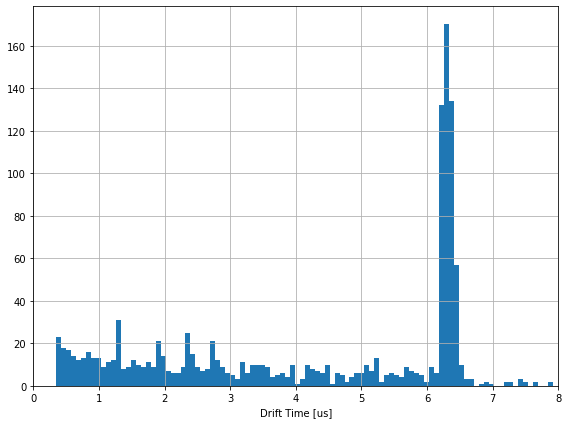

In [258]:

pl.figure()
pl.hist(cleanDTNew,bins=100)
pl.grid("both","both")
pl.xlabel("Drift Time [us]")
pl.xlim([0,8])
pl.show()



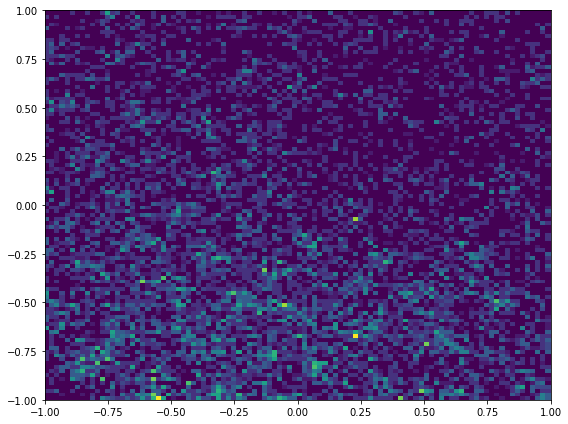

In [70]:
pl.figure()
pl.hist2d(clean_ctx,clean_cty,bins=100,range=((-1,1),(-1,1)))
pl.show()


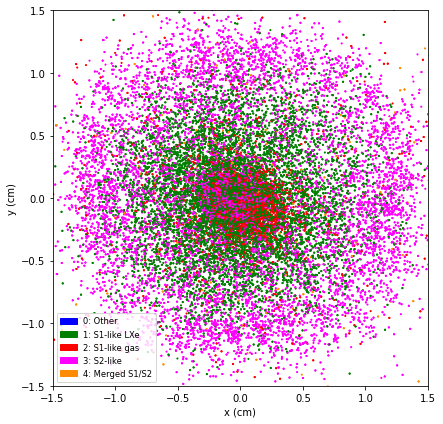

In [20]:

# Example plot
basicScatter(cleanCenterTopX, cleanCenterTopY, s=1.2, c=pulse_class_colors[cleanPulseClass], xlim=[-1.5, 1.5], ylim=[-1.5, 1.5], xlabel="x (cm)", ylabel="y (cm)", legHand=pc_legend_handles, name="TopCentroid_" + pulse_cut_name, save=save_pulse_plots, save_dir=save_dir, showsipms=True, show=True)
